# Some initial data-exploration

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [38]:
# read data
train_a = pd.read_parquet('data/A/train_targets.parquet')
train_b = pd.read_parquet('data/B/train_targets.parquet')
train_c = pd.read_parquet('data/C/train_targets.parquet')

X_train_estimated_a = pd.read_parquet('data/A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('data/B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('data/C/X_train_estimated.parquet')

X_train_observed_a = pd.read_parquet('data/A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('data/B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('data/C/X_train_observed.parquet')

X_test_estimated_a = pd.read_parquet('data/A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('data/B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('data/C/X_test_estimated.parquet')

In [39]:
# concat the dataframes, getting all locations

X_train_observed_a["location"] = "A"
X_train_observed_b["location"] = "B"
X_train_observed_c["location"] = "C"

X_train_observed = pd.concat([X_train_observed_a, X_train_observed_b, X_train_observed_c], axis=0, ignore_index=True)

X_train_estimated_a["location"] = "A"
X_train_estimated_b["location"] = "B"
X_train_estimated_c["location"] = "C"

X_train_estimated = pd.concat([X_train_estimated_a, X_train_estimated_b, X_train_estimated_c], axis=0, ignore_index=True)

train_a["location"] = "A"
train_b["location"] = "B"
train_c["location"] = "C"

train = pd.concat([train_a, train_b, train_c], axis=0, ignore_index=True)

# rename columns

X_train_observed.rename(columns={'date_forecast': 'time'}, inplace=True)
X_train_estimated.rename(columns={'date_forecast': 'time'}, inplace=True)

# join X and Y data

train_observed = pd.merge(X_train_observed, train, how="left", on=["time", "location"])
train_estimated = pd.merge(X_train_estimated, train, how="left", on=["time", "location"])

In [43]:
train_observed['location'] = pd.Categorical(train_observed.location)
train_estimated['location'] = pd.Categorical(train_estimated.location)

## Histogram

array([[<Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'absolute_humidity_2m:gm3'}>,
        <Axes: title={'center': 'air_density_2m:kgm3'}>,
        <Axes: title={'center': 'ceiling_height_agl:m'}>,
        <Axes: title={'center': 'clear_sky_energy_1h:J'}>,
        <Axes: title={'center': 'clear_sky_rad:W'}>,
        <Axes: title={'center': 'cloud_base_agl:m'}>],
       [<Axes: title={'center': 'dew_or_rime:idx'}>,
        <Axes: title={'center': 'dew_point_2m:K'}>,
        <Axes: title={'center': 'diffuse_rad:W'}>,
        <Axes: title={'center': 'diffuse_rad_1h:J'}>,
        <Axes: title={'center': 'direct_rad:W'}>,
        <Axes: title={'center': 'direct_rad_1h:J'}>,
        <Axes: title={'center': 'effective_cloud_cover:p'}>],
       [<Axes: title={'center': 'elevation:m'}>,
        <Axes: title={'center': 'fresh_snow_12h:cm'}>,
        <Axes: title={'center': 'fresh_snow_1h:cm'}>,
        <Axes: title={'center': 'fresh_snow_24h:cm'}>,
        <Axes: title={'cen

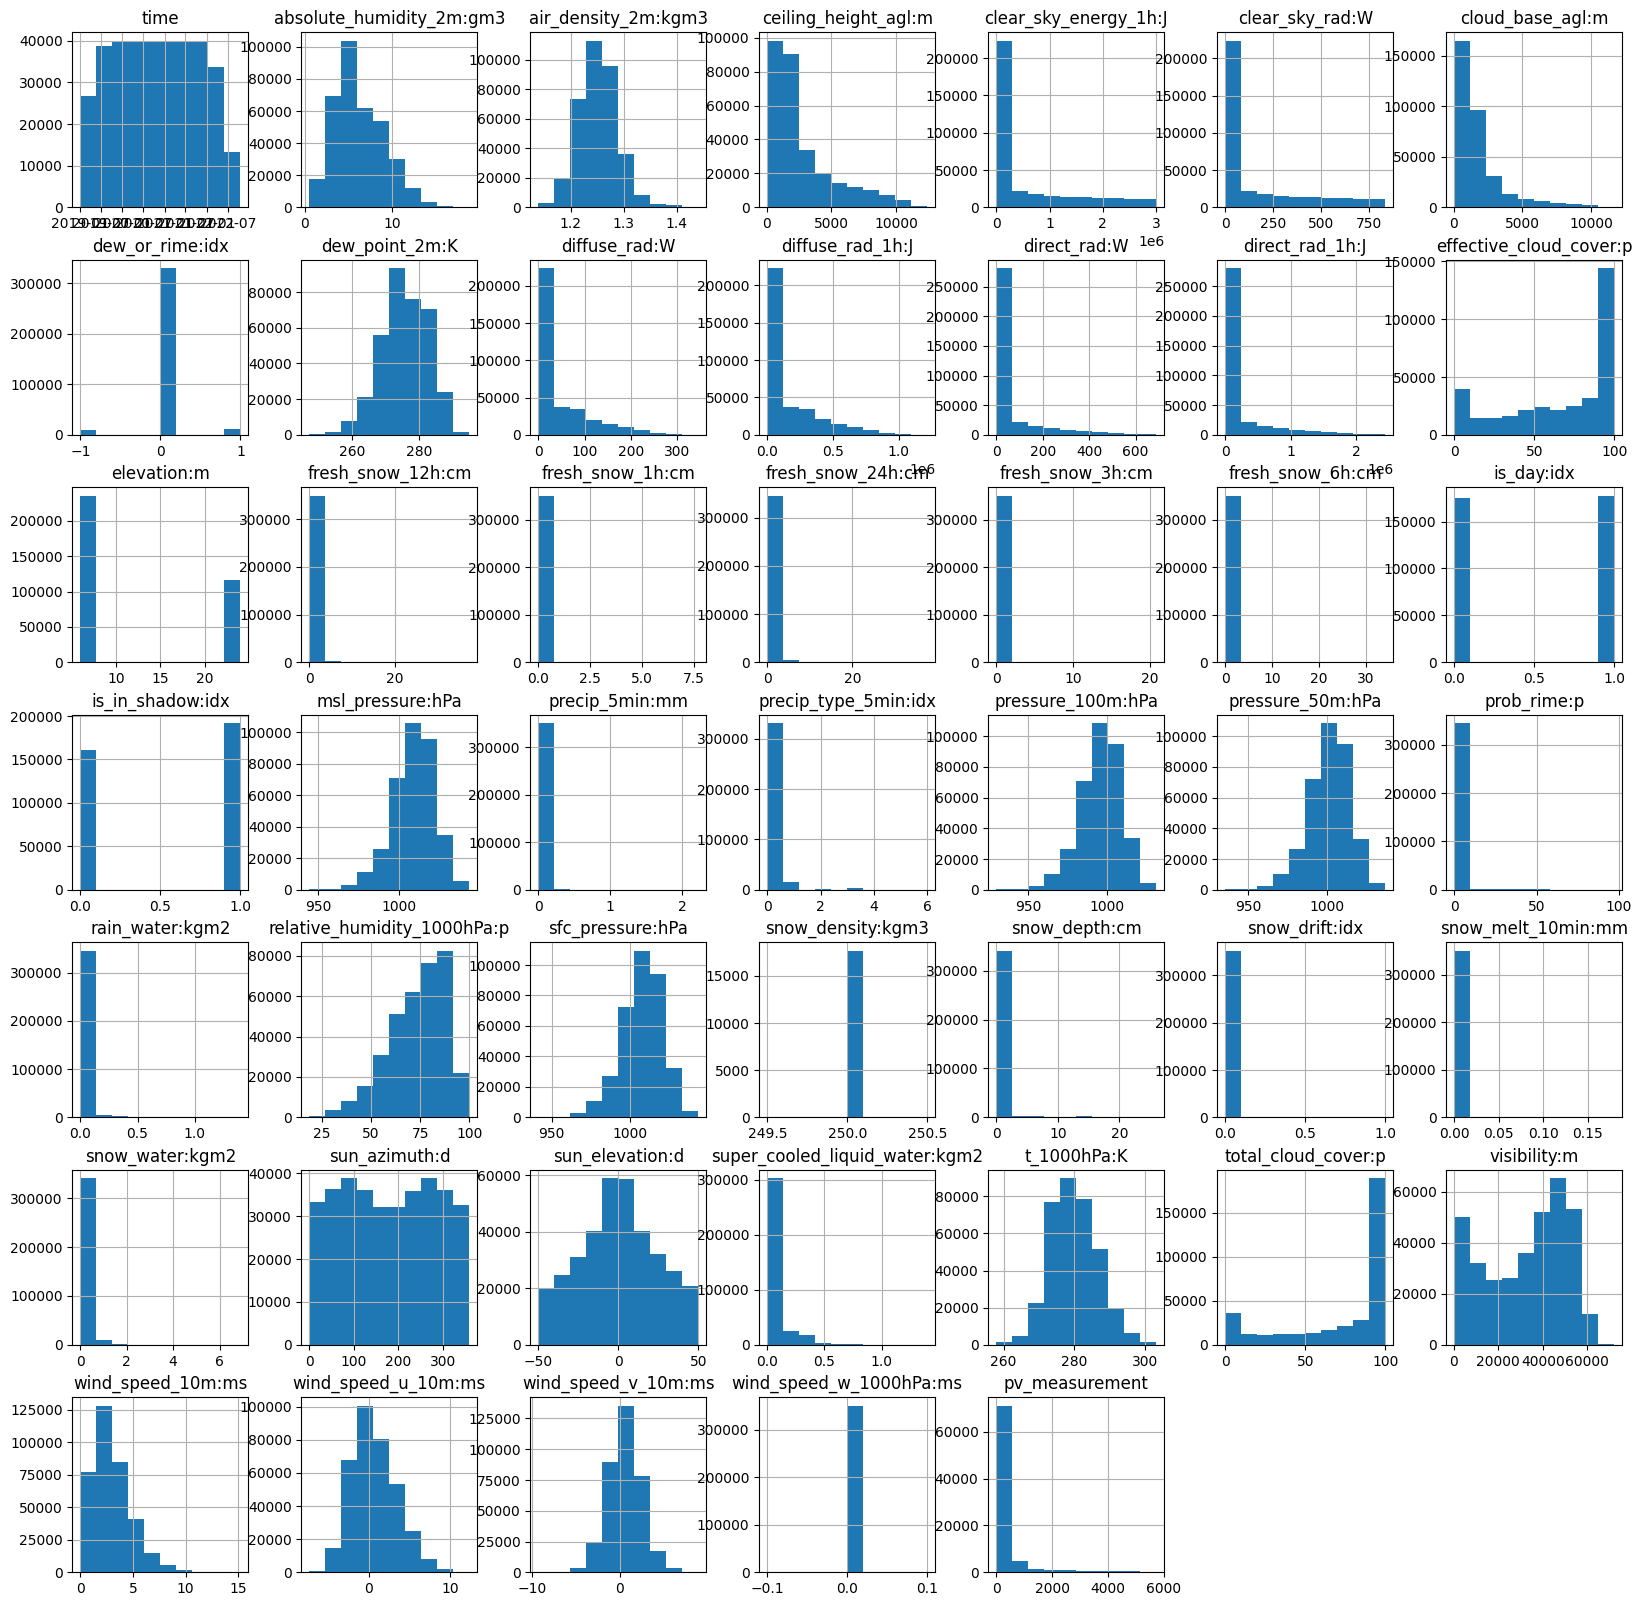

In [40]:
train_observed.hist(figsize=(20, 20))

array([[<Axes: title={'center': 'date_calc'}>,
        <Axes: title={'center': 'time'}>,
        <Axes: title={'center': 'absolute_humidity_2m:gm3'}>,
        <Axes: title={'center': 'air_density_2m:kgm3'}>,
        <Axes: title={'center': 'ceiling_height_agl:m'}>,
        <Axes: title={'center': 'clear_sky_energy_1h:J'}>,
        <Axes: title={'center': 'clear_sky_rad:W'}>],
       [<Axes: title={'center': 'cloud_base_agl:m'}>,
        <Axes: title={'center': 'dew_or_rime:idx'}>,
        <Axes: title={'center': 'dew_point_2m:K'}>,
        <Axes: title={'center': 'diffuse_rad:W'}>,
        <Axes: title={'center': 'diffuse_rad_1h:J'}>,
        <Axes: title={'center': 'direct_rad:W'}>,
        <Axes: title={'center': 'direct_rad_1h:J'}>],
       [<Axes: title={'center': 'effective_cloud_cover:p'}>,
        <Axes: title={'center': 'elevation:m'}>,
        <Axes: title={'center': 'fresh_snow_12h:cm'}>,
        <Axes: title={'center': 'fresh_snow_1h:cm'}>,
        <Axes: title={'center': 'f

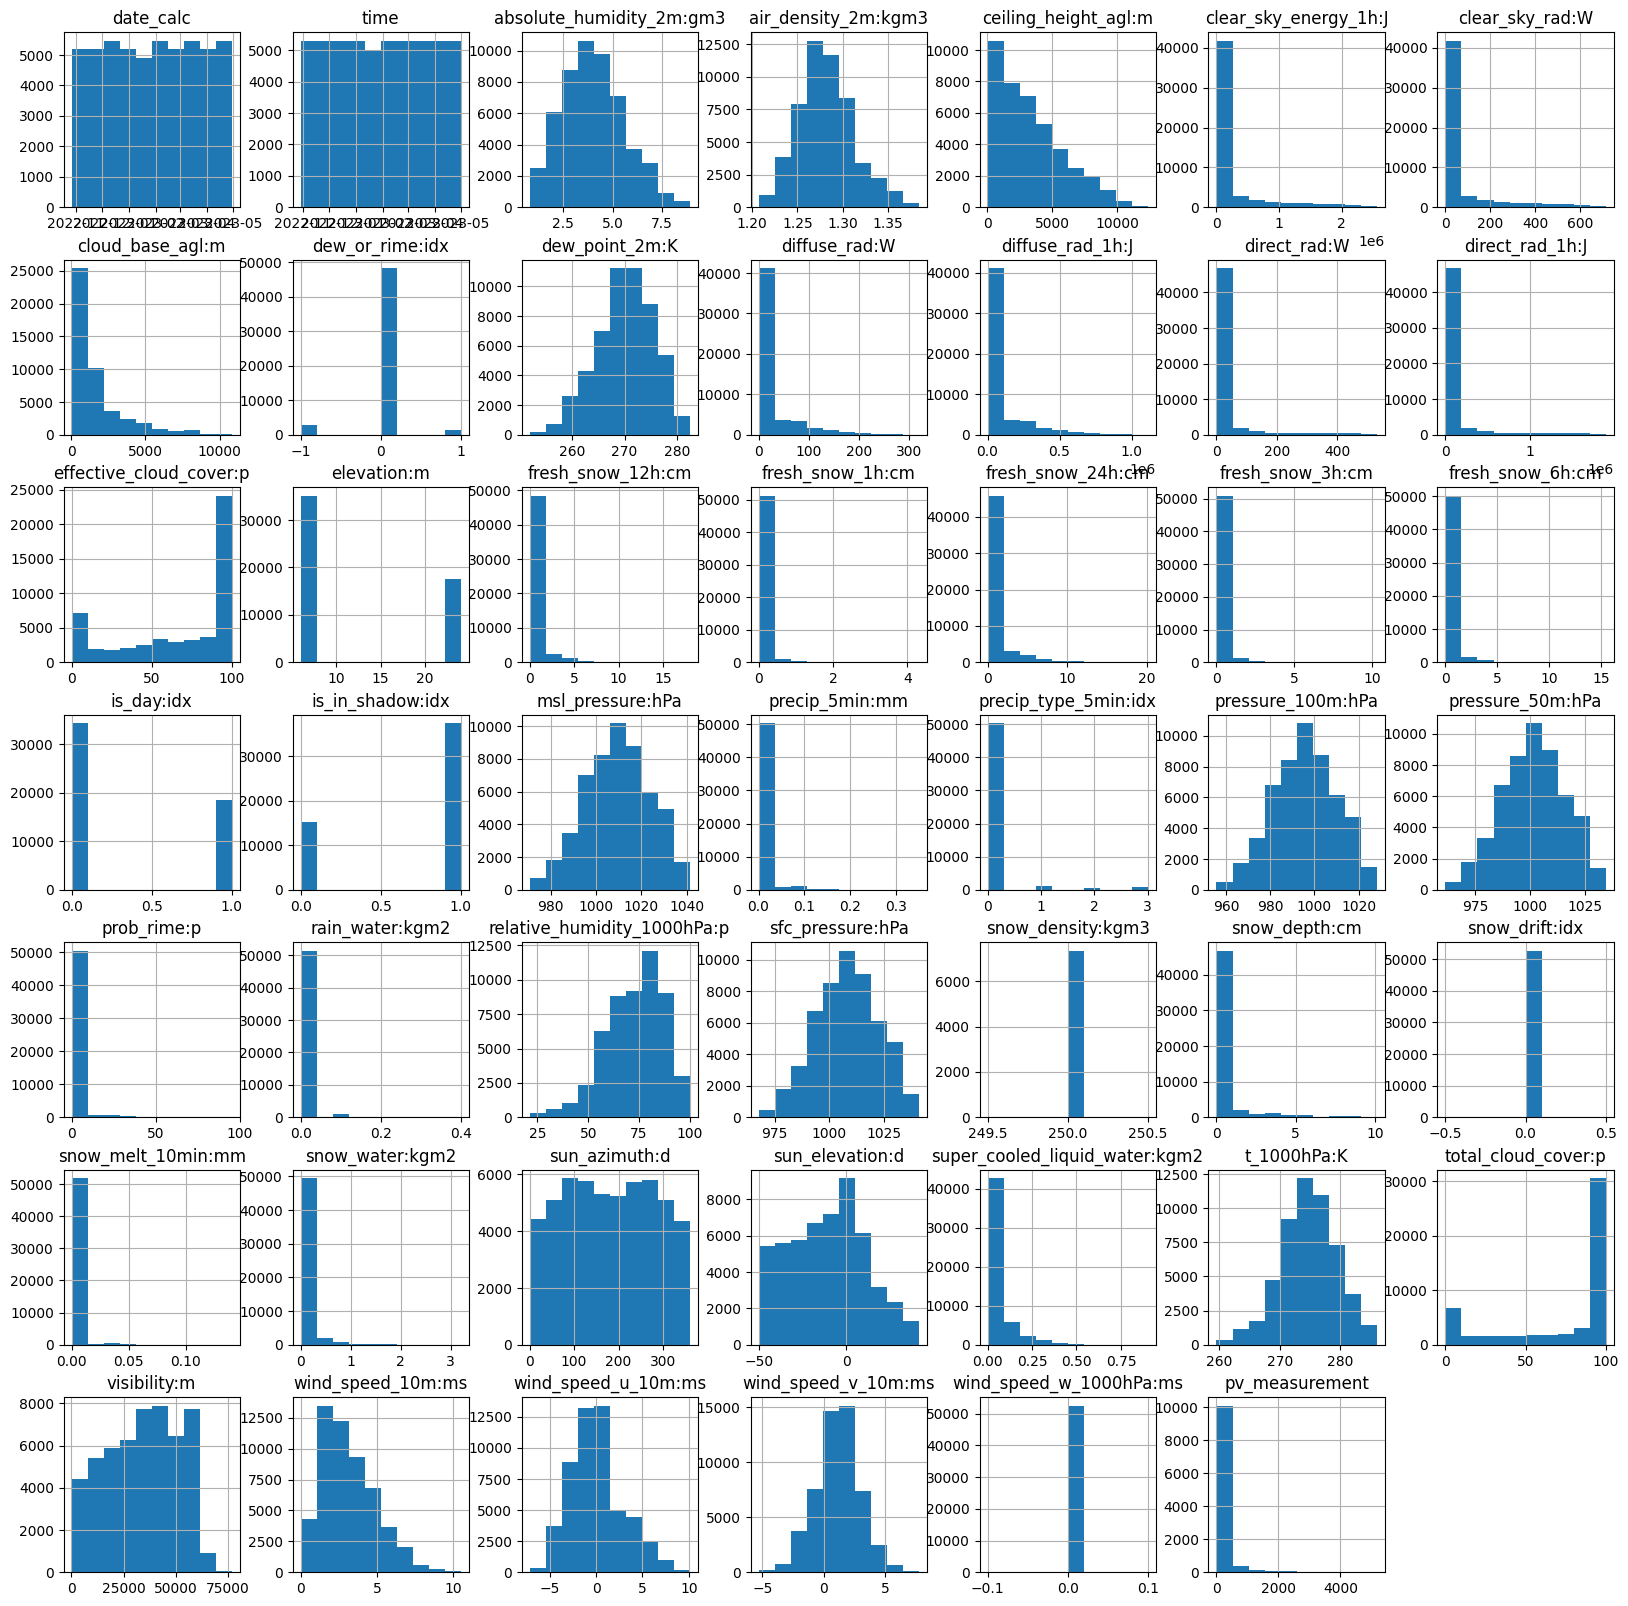

In [41]:
train_estimated.hist(figsize=(20, 20))

## Correlations

In [50]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_observed["location"] = encoder.fit_transform(train_observed["location"])
train_estimated["location"] = encoder.fit_transform(train_estimated["location"])

In [52]:
corr_matrix_observed = train_observed.corr()
corr_matrix_estimated = train_estimated.corr()

In [53]:
corr_matrix_observed["pv_measurement"].sort_values(ascending=False)

pv_measurement                    1.000000
direct_rad:W                      0.615025
clear_sky_rad:W                   0.598407
direct_rad_1h:J                   0.598358
clear_sky_energy_1h:J             0.583098
diffuse_rad:W                     0.525266
diffuse_rad_1h:J                  0.514714
sun_elevation:d                   0.501024
is_day:idx                        0.382466
t_1000hPa:K                       0.281082
dew_point_2m:K                    0.221421
absolute_humidity_2m:gm3          0.216277
pressure_100m:hPa                 0.150521
visibility:m                      0.148422
pressure_50m:hPa                  0.146694
sfc_pressure:hPa                  0.142850
ceiling_height_agl:m              0.136401
msl_pressure:hPa                  0.132731
cloud_base_agl:m                  0.117681
time                              0.059109
wind_speed_w_1000hPa:ms           0.001506
snow_drift:idx                   -0.001908
dew_or_rime:idx                  -0.011523
snow_melt_1

In [55]:
corr_matrix_estimated["pv_measurement"].sort_values(ascending=False)

pv_measurement                    1.000000
direct_rad:W                      0.600459
direct_rad_1h:J                   0.579013
clear_sky_rad:W                   0.545484
clear_sky_energy_1h:J             0.528030
diffuse_rad:W                     0.436421
diffuse_rad_1h:J                  0.426549
sun_elevation:d                   0.411520
is_day:idx                        0.359569
date_calc                         0.231378
time                              0.231270
pressure_100m:hPa                 0.142934
pressure_50m:hPa                  0.141831
sfc_pressure:hPa                  0.140725
msl_pressure:hPa                  0.133656
t_1000hPa:K                       0.071542
visibility:m                      0.070049
ceiling_height_agl:m              0.065427
cloud_base_agl:m                  0.038972
snow_melt_10min:mm                0.018486
dew_point_2m:K                    0.011149
absolute_humidity_2m:gm3          0.009383
wind_speed_w_1000hPa:ms           0.000914
dew_or_rime

Based on the most highly correlated features, look further at:
- direct_rad:W                     
- clear_sky_rad:W                  
- direct_rad_1h:J                  
- clear_sky_energy_1h:J            
- diffuse_rad:W                    
- diffuse_rad_1h:J                
- sun_elevation:d    
- is_day:idx             
- location
- is_in_shadow:idx 

In [59]:
# features = ["direct_rad:W", "clear_sky_rad:W", "direct_rad_1h:J", "clear_sky_energy_1h:J", "diffuse_rad:W", 
#             "diffuse_rad_1h:J", "sun_elevation:d", "is_day:idx", "location", "is_in_shadow:idx", "pv_measurement"] #Note pv_measurement not a feature

features = ["direct_rad:W", "clear_sky_rad:W", "sun_elevation:d", "location", "is_in_shadow:idx", "pv_measurement"] #Note pv_measurement not a feature

array([[<Axes: xlabel='direct_rad:W', ylabel='direct_rad:W'>,
        <Axes: xlabel='clear_sky_rad:W', ylabel='direct_rad:W'>,
        <Axes: xlabel='sun_elevation:d', ylabel='direct_rad:W'>,
        <Axes: xlabel='location', ylabel='direct_rad:W'>,
        <Axes: xlabel='is_in_shadow:idx', ylabel='direct_rad:W'>,
        <Axes: xlabel='pv_measurement', ylabel='direct_rad:W'>],
       [<Axes: xlabel='direct_rad:W', ylabel='clear_sky_rad:W'>,
        <Axes: xlabel='clear_sky_rad:W', ylabel='clear_sky_rad:W'>,
        <Axes: xlabel='sun_elevation:d', ylabel='clear_sky_rad:W'>,
        <Axes: xlabel='location', ylabel='clear_sky_rad:W'>,
        <Axes: xlabel='is_in_shadow:idx', ylabel='clear_sky_rad:W'>,
        <Axes: xlabel='pv_measurement', ylabel='clear_sky_rad:W'>],
       [<Axes: xlabel='direct_rad:W', ylabel='sun_elevation:d'>,
        <Axes: xlabel='clear_sky_rad:W', ylabel='sun_elevation:d'>,
        <Axes: xlabel='sun_elevation:d', ylabel='sun_elevation:d'>,
        <Axes: xlab

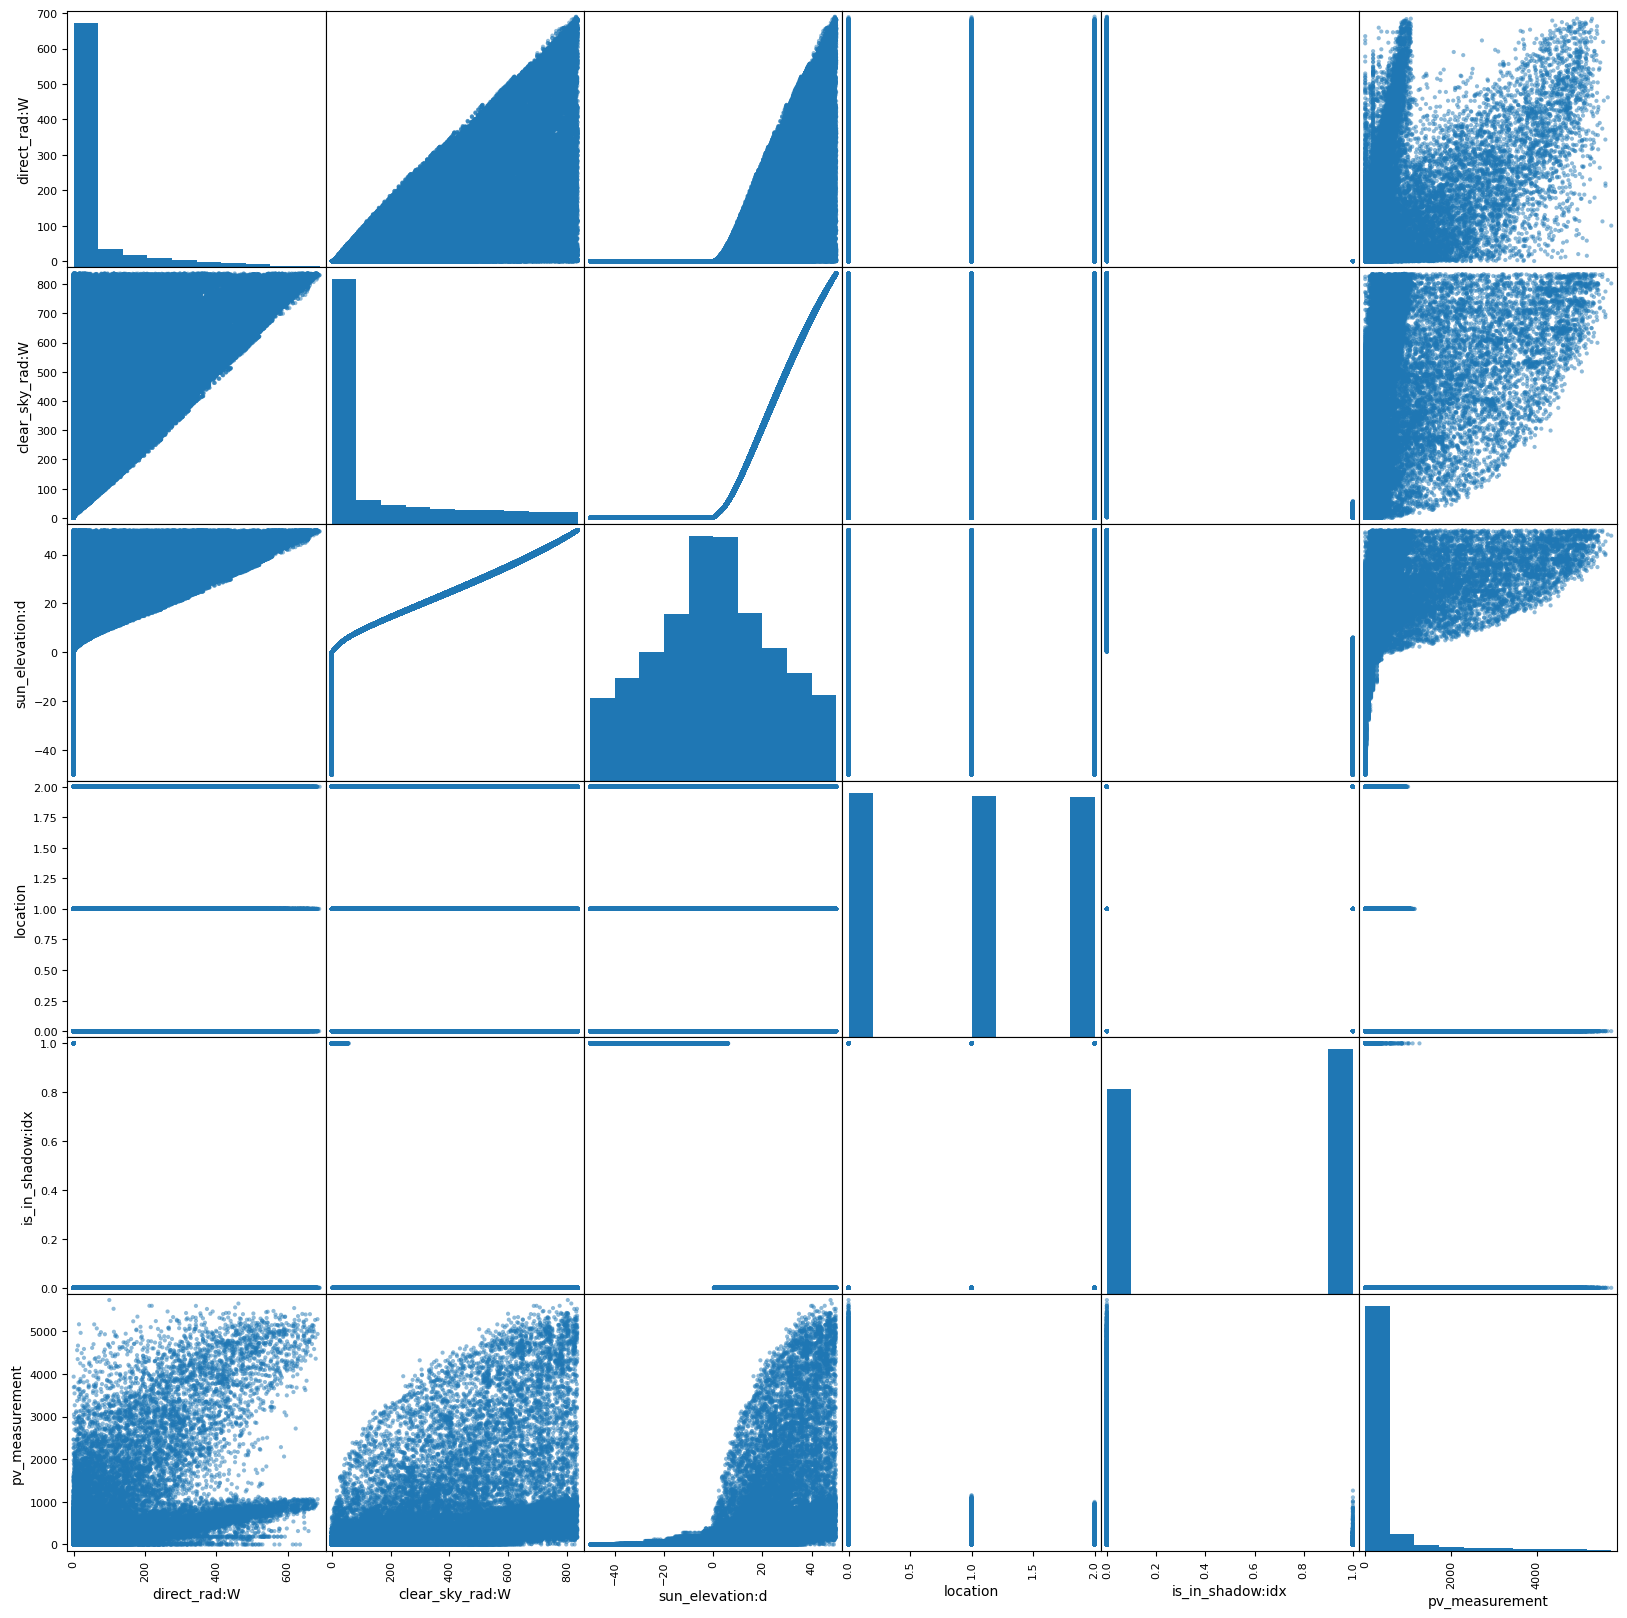

In [60]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_observed[features], figsize=(20, 20))